##**LEVEL 3 TASk 2**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# --- This part handles the file upload in Colab ---
print("Please upload your 'Dataset .csv' file:")
uploaded = files.upload()

# Get the file name you just uploaded
file_name = list(uploaded.keys())[0]
print(f"\nSuccessfully uploaded {file_name}")

# --- Task 1: Load the dataset and explore rows/columns ---
df = pd.read_csv(file_name)
print(f"\nThe dataset has {df.shape[0]} rows and {df.shape[1]} columns.")

Please upload your 'Dataset .csv' file:


Saving structured_dataset.csv to structured_dataset.csv

Successfully uploaded structured_dataset.csv

The dataset has 9551 rows and 24 columns.


##**Part 1: Data Preparation (Exploding Cuisines)**

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("--- Preparing Exploded Cuisine Data ---")

# Ensure the 'Cuisines' column is a string
# (This also handles any 'nan' floats by converting them to the string "nan")
df['Cuisines'] = df['Cuisines'].astype(str)

# Select the columns we need for this analysis
cuisine_df = df[['Cuisines', 'Aggregate rating', 'Votes']].copy()

# Create the 'Cuisine' column by splitting the string
cuisine_df['Cuisine'] = cuisine_df['Cuisines'].str.split(', ')

# Explode the DataFrame, each cuisine gets its own row
exploded_df = cuisine_df.explode('Cuisine')

# Clean up the new 'Cuisine' column (remove whitespace)
exploded_df['Cuisine'] = exploded_df['Cuisine'].str.strip()

# Create a 'rated_exploded_df' for rating analysis
# This drops 'Not Rated' restaurants (where 'Aggregate rating' is NaN)
# It also drops the 'Unknown' and 'nan' cuisine types we created
rated_exploded_df = exploded_df.dropna(subset=['Aggregate rating'])
rated_exploded_df = rated_exploded_df[
    (rated_exploded_df['Cuisine'] != 'Unknown') &
    (rated_exploded_df['Cuisine'] != 'nan')
]

print("Data prepared.")
print(f"Original 9,551 restaurants became {len(exploded_df)} individual cuisine entries.")
print(f"After cleaning 'Not Rated' and 'Unknown', we have {len(rated_exploded_df)} entries.")

--- Preparing Exploded Cuisine Data ---
Data prepared.
Original 9,551 restaurants became 19719 individual cuisine entries.
After cleaning 'Not Rated' and 'Unknown', we have 19710 entries.


##**2: Identify Most Popular Cuisines (by Votes)**


--- Top 10 Most Popular Cuisines (by Total Votes) ---
Cuisine
North Indian    595981
Chinese         364351
Italian         329265
Continental     288255
Fast Food       184058
American        183117
Cafe            177568
Mughlai         151946
Desserts        105889
Asian           104303
Name: Votes, dtype: int64


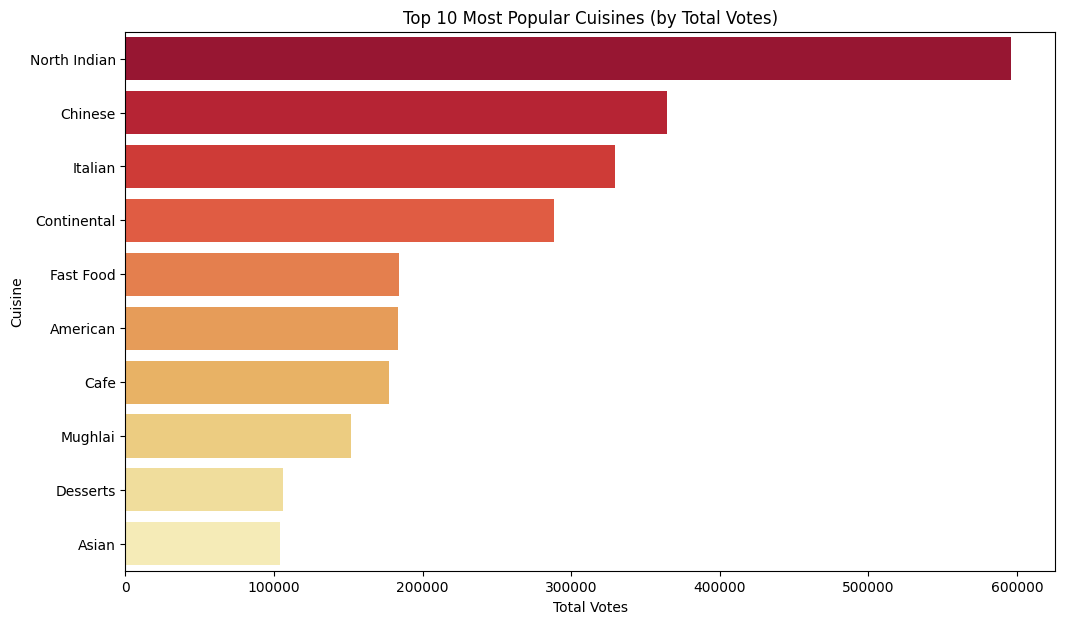

In [6]:
print("\n--- Top 10 Most Popular Cuisines (by Total Votes) ---")

# Group by individual 'Cuisine' and sum the 'Votes'
# We use the full 'exploded_df' for this
popular_cuisines = exploded_df.groupby('Cuisine')['Votes'].sum().sort_values(ascending=False)

print(popular_cuisines.head(10))

# --- Visualize ---
plt.figure(figsize=(12, 7))
sns.barplot(
    x=popular_cuisines.head(10).values,
    y=popular_cuisines.head(10).index,
    palette='YlOrRd_r', # Reversed Yellow-Orange-Red
    hue=popular_cuisines.head(10).index,
    legend=False
)
plt.title('Top 10 Most Popular Cuisines (by Total Votes)')
plt.xlabel('Total Votes')
plt.ylabel('Cuisine')
plt.savefig('top_10_popular_cuisines_by_votes.png', bbox_inches='tight')
plt.show()

##3: **Relationship Between Cuisine and Rating**


--- Top 10 Cuisines by Average Rating (Robust Analysis) ---
--- Top 10 Rated Cuisines (with at least 50 restaurants) ---
Cuisine
Sandwich         4.066038
Steak            3.985484
Sushi            3.973333
Mediterranean    3.948214
Indian           3.918571
European         3.910811
Seafood          3.862069
Asian            3.815021
Japanese         3.797037
Mexican          3.723204
Name: Aggregate rating, dtype: float64


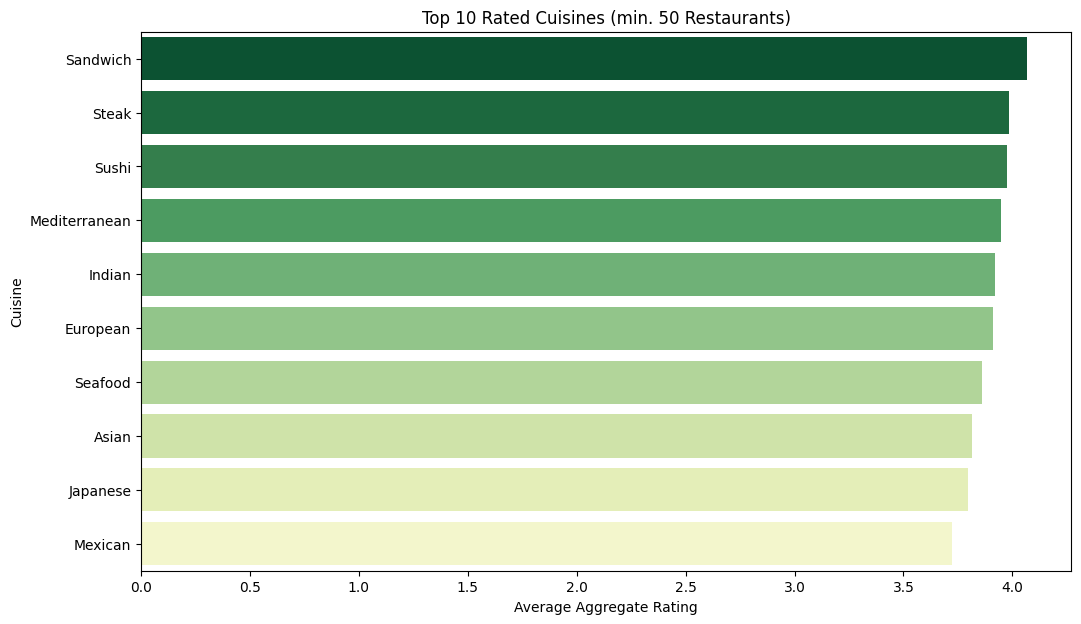

In [7]:
print("\n--- Top 10 Cuisines by Average Rating (Robust Analysis) ---")

# --- A Robust Analysis (The Better Way) ---
# First, get the count of restaurants for each cuisine
# We use 'rated_exploded_df' to only count rated restaurants
cuisine_counts = rated_exploded_df['Cuisine'].value_counts()

# Set a minimum threshold. Let's only look at cuisines with 50+ restaurants.
min_restaurants = 50
sufficient_data_cuisines = cuisine_counts[cuisine_counts >= min_restaurants].index

# Filter our rated DataFrame to *only* include these common cuisines
robust_df = rated_exploded_df[rated_exploded_df['Cuisine'].isin(sufficient_data_cuisines)]

# Now, calculate the mean rating and sort
top_rated_robust = robust_df.groupby('Cuisine')['Aggregate rating'].mean().sort_values(ascending=False)

print(f"--- Top 10 Rated Cuisines (with at least {min_restaurants} restaurants) ---")
print(top_rated_robust.head(10))

# --- Visualize the robust results ---
plt.figure(figsize=(12, 7))
sns.barplot(
    x=top_rated_robust.head(10).values,
    y=top_rated_robust.head(10).index,
    palette='YlGn_r', # Reversed Yellow-Green
    hue=top_rated_robust.head(10).index,
    legend=False
)
plt.title(f'Top 10 Rated Cuisines (min. {min_restaurants} Restaurants)')
plt.xlabel('Average Aggregate Rating')
plt.ylabel('Cuisine')
plt.savefig('top_10_rated_cuisines_robust.png', bbox_inches='tight')
plt.show()